In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [88]:
LMPD_Analytics = pd.read_csv("../Data/LMPD_crimes.csv")
LMPD_Analytics

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId
0,LMPD25147130,12/10/2025 3:57:00 PM,2/20/2024 5:00:00 AM,8701.0,19 THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,YES,8TH DIVISION,812,RESIDENCE/HOME,5000 BLOCK CLIFFWOOD RD,LOUISVILLE,40222,1
1,LMPD25144947,12/5/2025 5:28:00 PM,11/16/2024 5:00:00 AM,8701.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,4TH DIVISION,424,RESIDENCE/HOME,500 BLOCK LONGFIELD AVE,LOUISVILLE,40215,2
2,LMPD25140113,11/24/2025 4:22:00 AM,7/9/2024 4:00:00 AM,8631.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,8TH DIVISION,824,RESIDENCE/HOME,100 BLOCK LA FONTENAY DR,DOUGLASS HILLS,40223,3
3,LMPD25139843,11/23/2025 2:37:00 PM,11/15/2024 9:00:00 PM,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,YES,2ND DIVISION,223,HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK,1300 BLOCK S 26TH ST,LOUISVILLE,40210,4
4,LMPD25020252,2/24/2025 8:52:00 PM,12/19/2024 3:51:00 AM,8646.0,18 SHOPLIFTING,TBUT OR DISP SHOPLIFTING 514.030 24230 23C,23C,A,YES,3RD DIVISION,315,GROCERY/ SUPERMARKET,9900 BLOCK DIXIE HWY,LOUISVILLE,40272,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70771,LMPD23110521,11/12/2023 1:00:00 PM,1/16/2024 5:00:00 AM,7444.0,46 FAMILY OFFENSES,VIOLATION OF KENTUCKY EPO/DVO 403.763 02763 90F,90F,B,NO,3RD DIVISION,331,RESIDENCE/HOME,2800 BLOCK DE MEL AVE,LOUISVILLE,40214,70772
70772,LMPD23110062,11/10/2023 9:32:00 PM,2/3/2024 9:54:00 PM,5434.0,33 STOLEN PROPERTY,"RECEIVING STOLEN PROPERTY $1,000 < $10,000 514...",280,A,YES,3RD DIVISION,331,RESIDENCE/HOME,5300 BLOCK MILNER RD,LOUISVILLE,40216,70773
70773,LMPD23109383,11/9/2023 1:11:00 PM,4/13/2024 9:53:00 AM,7755.0,33 STOLEN PROPERTY,RECEIVING STOLEN PROPERTY (FIREARM) 514.110 28...,280,A,YES,4TH DIVISION,412,OTHER RESIDENCE (APARTMENT/CONDO),700 BLOCK S HANCOCK ST,LOUISVILLE,40203,70774
70774,LMPD23109575,11/8/2023 11:00:00 PM,10/5/2024 1:47:00 AM,8515.0,56 ALL OTHER OFFENSES,RECOVERY OF STOLEN PROPERTY ***.*** 03016 90Z,90Z,B,NO,4TH DIVISION,423,RESIDENCE/HOME,3600 BLOCK KAHLERT AVE,LOUISVILLE,40215,70775


In [89]:
LMPD_Analytics['date_occurred'] = pd.to_datetime(LMPD_Analytics['date_occurred'])
LMPD_Analytics['date_reported'] = pd.to_datetime(LMPD_Analytics['date_reported'])


C:\Users\zakm1\AppData\Local\Temp\ipykernel_2448\51368137.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  LMPD_Analytics['date_reported'] = pd.to_datetime(LMPD_Analytics['date_reported'])


In [90]:
LMPD_Analytics['report_delay_days'] = (
    LMPD_Analytics['date_reported'] - LMPD_Analytics['date_occurred']
).dt.days

LMPD_Timelines = (
    LMPD_Analytics
    .groupby('date_occurred')['report_delay_days']
    .mean().sort_values(ascending=False)
)

LMPD_Timelines

date_occurred
2024-01-23 21:35:00    580.0
2024-01-03 14:00:00    496.0
2024-03-30 05:00:00    424.0
2024-06-01 11:00:00    422.0
2024-03-15 12:30:00    389.0
                       ...  
2024-07-02 21:02:00      NaN
2024-10-17 06:15:00      NaN
2024-10-24 15:45:00      NaN
2024-10-24 23:45:00      NaN
2024-10-25 04:32:00      NaN
Name: report_delay_days, Length: 41694, dtype: float64

In [91]:
LMPD_Timelines.isnull()

date_occurred
2024-01-23 21:35:00    False
2024-01-03 14:00:00    False
2024-03-30 05:00:00    False
2024-06-01 11:00:00    False
2024-03-15 12:30:00    False
                       ...  
2024-07-02 21:02:00     True
2024-10-17 06:15:00     True
2024-10-24 15:45:00     True
2024-10-24 23:45:00     True
2024-10-25 04:32:00     True
Name: report_delay_days, Length: 41694, dtype: bool

In [92]:
Local_Crimes = LMPD_Analytics.groupby("city")["offense_classification"].value_counts()

Local_Crimes

city               offense_classification  
ANCHORAGE          14 AUTO THEFT               1
                   24 VANDALISM                1
                   58 ARSON                    1
ATLANTA            28 FRAUD CREDIT CARD/ATM    1
                   56 ALL OTHER OFFENSES       1
                                              ..
WORTHINGTON HILLS  29 FRAUD IMPERSONATION      1
                   4 FORCIBLE RAPE             1
                   55 TRESPASSING              1
                   8 ROBBERY                   1
WORTHINGTON_HILLS  13 BURGLARY                 1
Name: count, Length: 875, dtype: int64

In [93]:
Local_Crimes = (
    LMPD_Analytics
    .groupby(["city", "offense_classification"])
    .size()
    .reset_index(name="count")
)

Local_Crimes

,city,offense_classification,count
0,ANCHORAGE,14 AUTO THEFT,1
1,ANCHORAGE,24 VANDALISM,1
2,ANCHORAGE,58 ARSON,1
3,ATLANTA,28 FRAUD CREDIT CARD/ATM,1
4,ATLANTA,56 ALL OTHER OFFENSES,1
...,...,...,...
870,WORTHINGTON HILLS,56 ALL OTHER OFFENSES,20
871,WORTHINGTON HILLS,58 ARSON,2
872,WORTHINGTON HILLS,8 ROBBERY,1
873,WORTHINGTON HILLS,9 AGGRAVATED ASSAULT,6


In [94]:
Louisville_Crimes = (
    LMPD_Analytics[LMPD_Analytics["city"] == "LOUISVILLE"]
    .groupby("offense_classification")
    .size()
    .reset_index(name="count")
)

Louisville_Crimes

,offense_classification,count
0,1 HOMICIDE,148
1,10 KIDNAPPING ONLY,195
2,11 SIMPLE ASSAULT,7044
3,12 INTIMIDATION,4800
4,13 BURGLARY,3487
5,14 AUTO THEFT,5640
6,15 UNAUTHORIZED USE,190
7,16 PURSE SNATCH,15
8,17 PICK POCKET,84
9,18 SHOPLIFTING,3157


In [95]:
Louisville_Crimes_df = Louisville_Crimes.groupby("offense_classification")["count"].mean()

Louisville_Crimes_df

offense_classification
1 HOMICIDE                    148.0
10 KIDNAPPING ONLY            195.0
11 SIMPLE ASSAULT            7044.0
12 INTIMIDATION              4800.0
13 BURGLARY                  3487.0
14 AUTO THEFT                5640.0
15 UNAUTHORIZED USE           190.0
16 PURSE SNATCH                15.0
17 PICK POCKET                 84.0
18 SHOPLIFTING               3157.0
19 THEFT FR BLDG             1364.0
2 NEGLIGENT HOMICIDE            7.0
20 THEFT FR VEND MACHINE       22.0
21 THEFT FR VEH              3888.0
22 THEFT MV PARTS            1196.0
23 LARCENY                   1928.0
23 THEFT OTHER               4581.0
24 VANDALISM                 6475.0
25 EXTORTION                   44.0
26 COUNTERFEITING             601.0
27 FRAUD                      433.0
28 FRAUD CREDIT CARD/ATM     1050.0
29 FRAUD IMPERSONATION        701.0
3 JUSTIFIABLE HOMICIDE         10.0
32 EMBEZZLEMENT               206.0
32 THEFT FR BLDG               20.0
33 STOLEN PROPERTY            928.0
34 NA

Text(0, 0.5, 'Frequency')

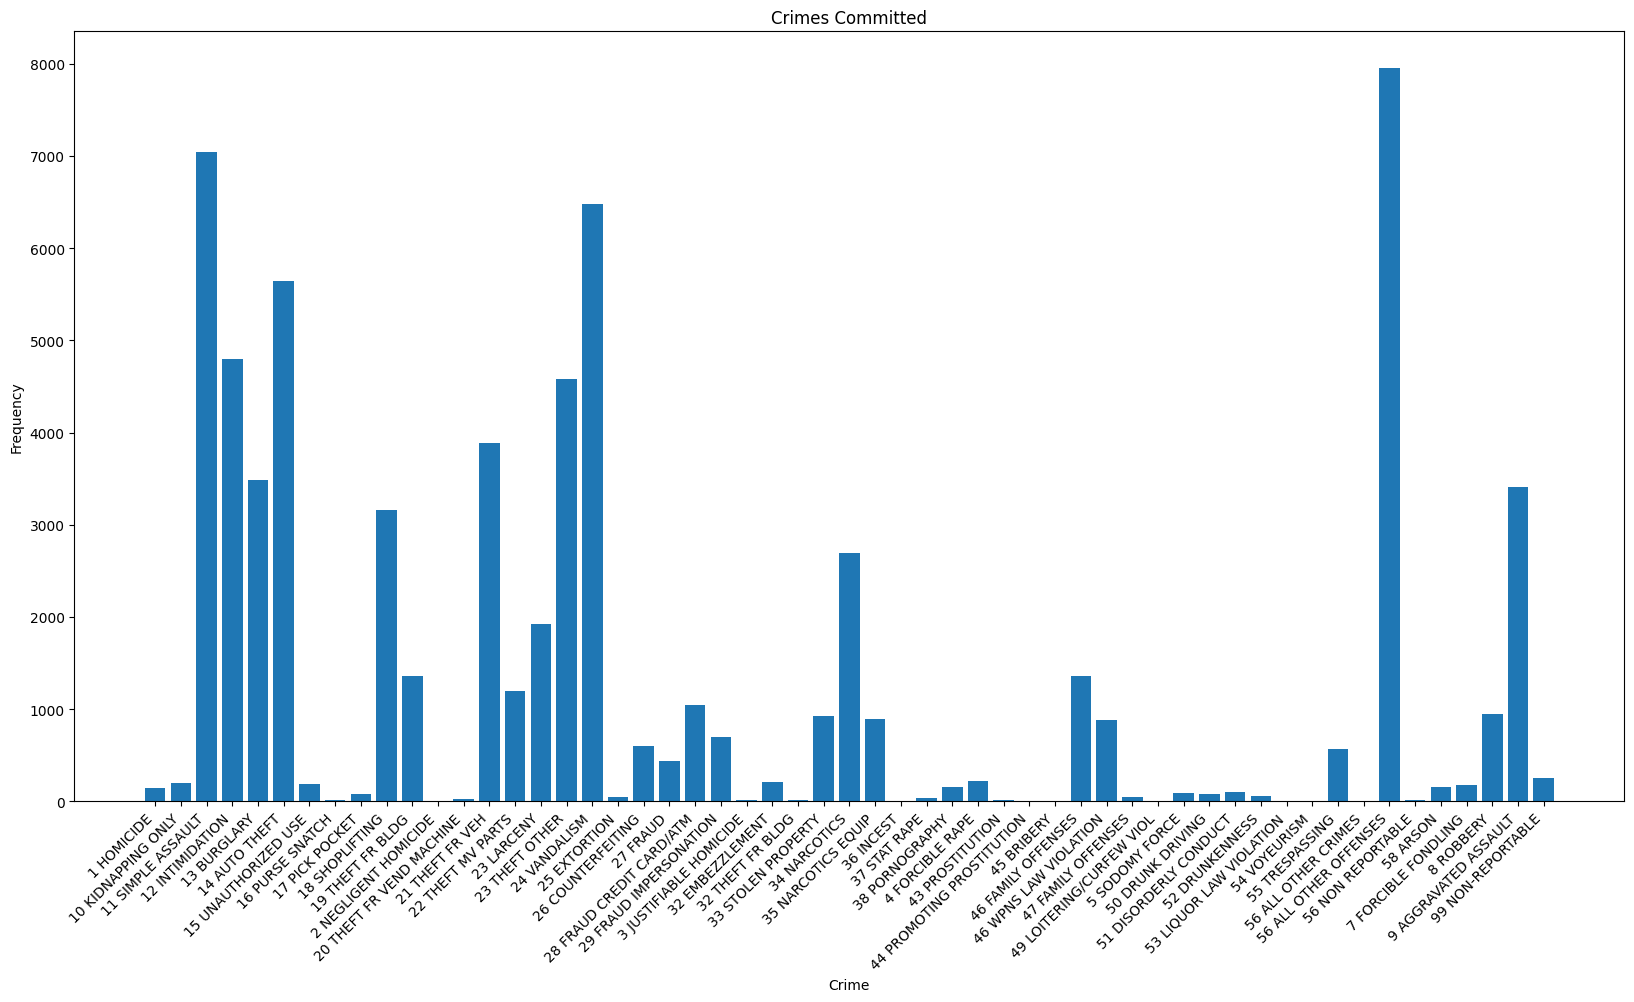

In [96]:
plt.figure(figsize=(20,10))
plt.bar(Louisville_Crimes_df.index, Louisville_Crimes_df.values)
plt.xticks(rotation=45, ha="right")
plt.title("Crimes Committed")
plt.xlabel("Crime")
plt.ylabel("Frequency")

### This is a graph showing the number of occurences for each listed crime. I chose to use a bar graph to help contextualize the frequency with which some crimes occur as opposed to others. I didn't make any specific choices with the color pattern.

In [97]:
Louisville_Murders = (
    LMPD_Analytics[LMPD_Analytics["offense_classification"] == "1 HOMICIDE"]
    .groupby("offense_classification")
    .size()
    .reset_index(name="count")
)

Louisville_Murders

,offense_classification,count
0,1 HOMICIDE,153


In [98]:
Louisville_Bribery = (
    LMPD_Analytics[LMPD_Analytics["offense_classification"] == "45 BRIBERY"]
    .groupby("offense_classification")
    .size()
    .reset_index(name="count")
)

Louisville_Bribery

,offense_classification,count
0,45 BRIBERY,3


In [99]:
Louisville_Embezzlement = (
    LMPD_Analytics[LMPD_Analytics["offense_classification"] == "32 EMBEZZLEMENT"]
    .groupby("offense_classification")
    .size()
    .reset_index(name="count")
)

Louisville_Embezzlement

,offense_classification,count
0,32 EMBEZZLEMENT,209


In [100]:
Louisville_Arson = (
    LMPD_Analytics[LMPD_Analytics["offense_classification"] == "58 ARSON"]
    .groupby("offense_classification")
    .size()
    .reset_index(name="count")
)

Louisville_Arson

,offense_classification,count
0,58 ARSON,170


In [101]:
offenses = ["1 HOMICIDE", "45 BRIBERY", "32 EMBEZZLEMENT", "58 ARSON"]

Louisville_Crimes2 = LMPD_Analytics[LMPD_Analytics["offense_classification"].isin(offenses)].groupby("offense_classification").size().reset_index(name="count")

Louisville_Crimes2

,offense_classification,count
0,1 HOMICIDE,153
1,32 EMBEZZLEMENT,209
2,45 BRIBERY,3
3,58 ARSON,170


Text(0.5, 1.0, 'Assorted Crimes in Louisville')

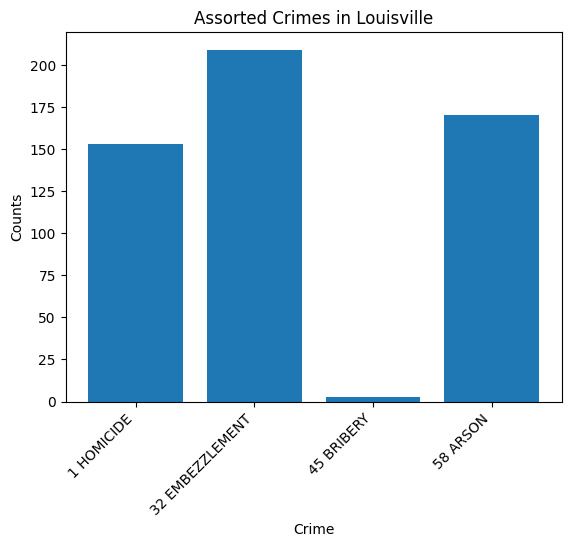

In [102]:
plt.bar(Louisville_Crimes2["offense_classification"], Louisville_Crimes2["count"])
plt.xlabel("Crime")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.title("Assorted Crimes in Louisville")


### Truthfully, the crimes of homicide, embezzlement, bribery, and arson weren't completely random. I chose homicide and arson because they're very visible crimes that often make headlines, as a result I was morbidly curious to see just how often they actually occur based on what's been reported. I chose the crimes of embezzlement and bribery because even though they can "slide under the radar" they can do irreparable damage. Especially if the amount of money in question is exorbitant.

In [156]:
offenses = ["11 SIMPLE ASSAULT", "24 VANDALISM", "14 AUTO THEFT"]

Gotham = LMPD_Analytics[LMPD_Analytics["offense_classification"].isin(offenses)].groupby("offense_classification").size().reset_index(name="count")

Gotham

,offense_classification,count
0,11 SIMPLE ASSAULT,7266
1,14 AUTO THEFT,5789
2,24 VANDALISM,6623


Text(0.5, 1.0, 'Highest Specific Crimes in Louisville')

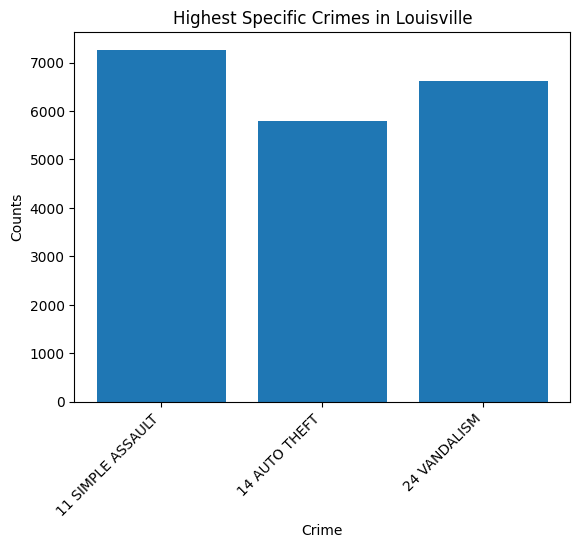

In [104]:
plt.bar(Gotham["offense_classification"], Gotham["count"])
plt.xlabel("Crime")
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.title("Highest Specific Crimes in Louisville")

## I picked simple assault, auto theft, and vandalism because these are the specific crimes that had the highest reported occurences in the data. I chose a simple bar graph to make it easy to understand to any potential audiences who may view the data.

In [105]:
LMPD_Timelines = LMPD_Analytics.groupby("date_occurred")["date_reported"].value_counts()

LMPD_Timelines

date_occurred        date_reported      
2024-01-01 05:00:00  2024-01-01 05:00:00    12
                     2023-11-16 16:20:00     2
                     2024-01-23 17:08:00     2
                     2024-01-01 16:02:00     1
                     2024-01-01 17:26:00     1
                                            ..
2025-01-01 04:30:00  2025-01-01 16:41:00     1
                     2025-01-02 18:11:00     1
2025-01-01 04:45:00  2025-01-01 04:45:00     2
2025-01-01 04:50:00  2025-01-01 04:50:00     1
                     2025-01-01 06:05:00     1
Name: count, Length: 53273, dtype: int64

In [106]:
LMPD_Analytics.head()

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId,report_delay_days
0,LMPD25147130,2025-12-10 15:57:00,2024-02-20 05:00:00,8701.0,19 THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,YES,8TH DIVISION,812,RESIDENCE/HOME,5000 BLOCK CLIFFWOOD RD,LOUISVILLE,40222,1,659.0
1,LMPD25144947,2025-12-05 17:28:00,2024-11-16 05:00:00,8701.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,4TH DIVISION,424,RESIDENCE/HOME,500 BLOCK LONGFIELD AVE,LOUISVILLE,40215,2,384.0
2,LMPD25140113,2025-11-24 04:22:00,2024-07-09 04:00:00,8631.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,8TH DIVISION,824,RESIDENCE/HOME,100 BLOCK LA FONTENAY DR,DOUGLASS HILLS,40223,3,503.0
3,LMPD25139843,2025-11-23 14:37:00,2024-11-15 21:00:00,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,YES,2ND DIVISION,223,HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK,1300 BLOCK S 26TH ST,LOUISVILLE,40210,4,372.0
4,LMPD25020252,2025-02-24 20:52:00,2024-12-19 03:51:00,8646.0,18 SHOPLIFTING,TBUT OR DISP SHOPLIFTING 514.030 24230 23C,23C,A,YES,3RD DIVISION,315,GROCERY/ SUPERMARKET,9900 BLOCK DIXIE HWY,LOUISVILLE,40272,5,67.0


In [107]:
LMPD_Analytics.columns
LMPD_Analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70776 entries, 0 to 70775
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   incident_number         70776 non-null  object        
 1   date_reported           70768 non-null  datetime64[ns]
 2   date_occurred           70776 non-null  datetime64[ns]
 3   badge_id                70771 non-null  float64       
 4   offense_classification  70645 non-null  object        
 5   offense_code_name       70774 non-null  object        
 6   nibrs_code              70776 non-null  object        
 7   nibrs_group_name        70776 non-null  object        
 8   was_offense_completed   70776 non-null  object        
 9   lmpd_division           70531 non-null  object        
 10  lmpd_beat               70495 non-null  object        
 11  location_category       70735 non-null  object        
 12  block_address           69663 non-null  object

In [108]:
LMPD_Analytics['incident_number'].unique()


array(['LMPD25147130', 'LMPD25144947', 'LMPD25140113', ...,
       'LMPD23109383', 'LMPD23109575', 'LMPD23107772'],
      shape=(57864,), dtype=object)

In [109]:
LMPD_Analytics['date_reported'].unique()


<DatetimeArray>
['2025-12-10 15:57:00', '2025-12-05 17:28:00', '2025-11-24 04:22:00',
 '2025-11-23 14:37:00', '2025-02-24 20:52:00', '2025-11-20 20:54:00',
 '2025-11-20 19:29:00', '2025-11-20 15:53:00', '2025-11-18 20:40:00',
 '2025-11-18 15:00:00',
 ...
 '2023-06-14 15:38:00', '2022-11-26 17:00:00', '2023-11-16 16:00:00',
 '2023-06-12 13:00:00', '2023-11-15 21:29:00', '2023-11-12 13:00:00',
 '2023-11-10 21:32:00', '2023-11-09 13:11:00', '2023-11-08 23:00:00',
 '2023-11-05 19:35:00']
Length: 49836, dtype: datetime64[ns]

In [110]:
LMPD_Analytics['date_occurred'].unique()


<DatetimeArray>
['2024-02-20 05:00:00', '2024-11-16 05:00:00', '2024-07-09 04:00:00',
 '2024-11-15 21:00:00', '2024-12-19 03:51:00', '2024-01-01 05:01:00',
 '2024-10-29 16:00:00', '2024-08-20 04:01:00', '2024-07-01 04:00:00',
 '2024-09-01 04:00:00',
 ...
 '2024-08-07 02:16:00', '2024-02-04 23:28:00', '2024-10-24 23:45:00',
 '2024-08-14 00:34:00', '2024-05-31 14:10:00', '2024-01-25 15:50:00',
 '2024-07-01 18:19:00', '2024-04-30 17:37:00', '2024-02-09 18:20:00',
 '2024-10-05 01:47:00']
Length: 41694, dtype: datetime64[ns]

In [111]:
LMPD_Analytics['badge_id'].unique()


array([  8701.,   8631.,   8560.,   8646.,   8544.,   8358.,   8643.,
         4354.,   8584.,   7269.,   5237.,   5067.,   5427.,   8630.,
         8499.,   5468.,   7283.,   8665.,   8708.,   8659.,   8585.,
         8185.,   7235.,   8611.,   8064.,   5522.,   5388.,   5663.,
         8454.,   5344.,   5263.,   2413.,   5158.,   5596.,   7427.,
         7004.,   5033.,   8661.,   8373.,   5286.,   6129.,   7205.,
         7035.,   8402.,   5349.,   5247.,   5249.,   7340.,   5186.,
         7371.,   7288.,   5135.,   6028.,   2469.,   7090.,   5258.,
         8173.,   5646.,   2489.,   7793.,   7080.,   5519.,   2623.,
         5606.,   5107.,   5104.,   5571.,   6311.,   7905.,   5144.,
         5312.,   5536.,   8592.,   5211.,   7962.,   5433.,   5112.,
         5218.,   7298.,   5233.,   9199.,   5319.,   5267.,   5471.,
         7632.,   7244.,   7472.,   7984.,   5652.,   5399.,   8644.,
         5410.,   7900.,   5615.,   5654.,   5330.,   7232.,   5332.,
         5439.,   74

In [112]:
LMPD_Analytics['offense_classification'].unique()

array(['19 THEFT FR BLDG', '29 FRAUD IMPERSONATION', '14 AUTO THEFT',
       '18 SHOPLIFTING', '23 THEFT OTHER', '28 FRAUD CREDIT CARD/ATM',
       '12 INTIMIDATION', '56 ALL OTHER OFFENSES', '13 BURGLARY',
       '22 THEFT MV PARTS', '32 EMBEZZLEMENT', '4 FORCIBLE RAPE',
       '24 VANDALISM', '43 PROSTITUTION', '26 COUNTERFEITING',
       '21 THEFT FR VEH', '46 FAMILY OFFENSES', '36 INCEST',
       '37 STAT RAPE', '5 SODOMY FORCE', '7 FORCIBLE FONDLING',
       '38 PORNOGRAPHY', nan, '9 AGGRAVATED ASSAULT',
       '15 UNAUTHORIZED USE', '34 NARCOTICS', '33 STOLEN PROPERTY',
       '23 LARCENY', '27 FRAUD', '46 WPNS LAW VIOLATION',
       '11 SIMPLE ASSAULT', '32 THEFT FR BLDG', '1 HOMICIDE',
       '35 NARCOTICS EQUIP', '55 TRESPASSING', '8 ROBBERY',
       '99 NON-REPORTABLE', '10 KIDNAPPING ONLY',
       '3 JUSTIFIABLE HOMICIDE', '20 THEFT FR VEND MACHINE',
       '51 DISORDERLY CONDUCT', '52 DRUNKENNESS', '50 DRUNK DRIVING',
       '56 ALL OTHER CRIMES', '58 ARSON', '47 FAMILY OFF

In [113]:
LMPD_Analytics['offense_code_name'].unique()

array(['TBUT OR DISP FROM BUILDING $1,000 < $10,000 514.030 24162 23D',
       'THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 514.160 23310 26C',
       'TBUT OR DISP AUTO $1,000 < $10,000 514.030 24112 240',
       'TBUT OR DISP SHOPLIFTING 514.030 24230 23C',
       'THEFT BY DECEPTION INCLUDING COLD CHECKS $1,000 < $10,000 514.040(8)(b) 71287 23H',
       'THEFT BY DECEPTION INCLUDING COLD CHECKS $10,000 OR MORE 514.040(8)(c) 71289 23H',
       'FRAUDULENT USE OF A CREDIT CARD > $10,000 434.650(1)(B)(4) 71206 26B',
       'TBUT OR DISP FROM BUILDING 514.030 24160 23D',
       'HARASSMENT (NO PHYSICAL CONTACT) 525.070 02405 13C',
       'UNLAWFUL ACCESS TO COMPUTER-1ST DEGREE 434.845 51260 90Z',
       'TBUT OR DISP FIREARM 514.030 23100 23H',
       'BURGLARY - 3RD DEGREE 511.040 22062 220',
       'FRAUDULENT USE OF A CREDIT CARD $1000 < $10,000 434.650(1)(B)(2) 71204 26B',
       'TERRORISTIC THREATENING 3RD DEGREE 508.080 00822 13C',
       'THEFT OF MOTOR VEHICLE REGISTRATION PLA

In [114]:
LMPD_Analytics['nibrs_code'].unique()


array(['23D', '26C', '240', '23C', '23H', '26B', '13C', '26G', '220',
       '23G', '270', '11A', '90Z', '290', '64B', '250', '23F', '90F',
       '36A', '999', '13A', '720', '35A', '280', '26A', '520', '13B',
       '11D', '11B', '370', '09A', '35B', '90J', '120', '36B', '100',
       '09C', '23E', '90C', '90E', '90D', '200', '23A', '90H', '210',
       '23B', '90B', '09B', '510', '90G', '64A', '40B', '26F'],
      dtype=object)

In [115]:
LMPD_Analytics['nibrs_group_name'].unique()


array(['A', 'B'], dtype=object)

In [116]:
LMPD_Analytics['lmpd_division'].unique()


array(['8TH DIVISION', '4TH DIVISION', '2ND DIVISION', '3RD DIVISION',
       '1ST DIVISION', '6TH DIVISION', '7TH DIVISION', '5TH DIVISION',
       nan, 'CAL', 'OOJ', 'WEST BUECHEL', 'JEFFERSONTOWN', 'MIDDLETOWN',
       'SHIVELY', 'ST MATTHEWS', 'LYNDON', 'INDIAN HILLS', 'AUDUBON PARK',
       'ANCHORAGE', 'LMPD', 'PROSPECT', 'OLDHAM'], dtype=object)

In [117]:
LMPD_Analytics['lmpd_beat'].unique()

array(['812', '424', '824', '223', '315', '111', '323', '625', '225',
       '736', '735', '412', '322', '711', '512', '316', '112', '815',
       '331', '423', '712', '411', nan, '334', '724', '236', '525', '811',
       '234', '624', '514', '135', '123', '513', '612', '611', '613',
       '521', '823', '134', '723', '211', '436', 'CAL', 'OOJ', 'WB',
       'JTN', '212', 'MTN', '450', '435', '1', 'SHV', 'STM', 'LYND',
       'INH', 'AUD', 'ANC', 'PRO', 'OLD', 'IH'], dtype=object)

In [118]:
LMPD_Analytics['location_category'].unique()

array(['RESIDENCE/HOME', 'HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK',
       'GROCERY/ SUPERMARKET', 'OTHER RESIDENCE (APARTMENT/CONDO)',
       'CYBERSPACE', 'RENTAL STORAGE FACILITY',
       'CHURCH/SYNAGOGUE/TEMPLE/MOSQUE', 'AUTO DEALERSHIP NEW/USED',
       'BAR/NIGHTCLUB', 'PARKING/ DROP LOT/ GARAGE',
       'COMMERCIAL/OFFICE BUILDING', 'DEPARTMENT/DISCOUNT STORE',
       'OTHER/UNKNOWN', 'BANK/SAVINGS AND LOAN', 'HOTEL/ MOTEL/ ETC.',
       "DRUG STORE/DOCTOR'S OFFICE/HOSPITAL", 'SPECIALTY STORE',
       'SCHOOL - ELEMENTARY/SECONDARY', 'LIQUOR STORE', 'INDUSTRIAL SITE',
       'SHELTER - MISSION/ HOMELESS', 'RESTAURANT',
       'NON-ATTACHED RESD GARAGE/SHED/BULD', 'CONSTRUCTION SITE',
       'ARENA/STADIUM/FAIRGROUNDS/COLISEUM', 'AIR/BUS/TRAIN TERMINAL',
       'CONVENIENCE STORE', 'DAYCARE FACILITY', 'SHOPPING MALL',
       'SERVICE/GAS STATION',
       'JAIL/PRISON/PENITENTIARY/CORRECTIONS FACILITY',
       'PARK/ PLAYGROUND', 'FIELD/WOODS', 'GOVERNMENT/ PUBLIC BUILDING',
     

In [119]:
LMPD_Analytics['city'].unique()

array(['LOUISVILLE', 'DOUGLASS HILLS', 'ROLLING HILLS', 'FRANKFORT',
       'RICHLAWN', 'LANGDON PLACE', 'FOREST HILLS', 'SHEPHERDSVILLE',
       'WEST BUECHEL', 'JEFFERSONTOWN', 'HURSTBOURNE ACRES', 'MIDDLETOWN',
       'WINDY HILLS', 'ATLANTA', 'LYNNVIEW',
       'LOUISVILLE-JEFFERSON COUNTY', 'WATTERSON PARK', 'WEST SPENCER',
       'BLUE RIDGE MANOR', 'PLANTATION', 'SHIVELY', 'BARBOURMEADE',
       'ST. REGIS PARK', 'HILLVIEW', 'WESTWOOD', 'MEADOW VALE',
       'RIVERWOOD', 'MOCKINGBIRD VALLEY', 'WOODLAND HILLS',
       'SPRING VALLEY', 'NORTHFIELD', 'COLDSTREAM', 'WORTHINGTON HILLS',
       'CREEKSIDE', 'ST MATTHEWS', 'WELLINGTON', 'GREEN SPRING',
       'GLENVIEW', 'DRUID HILLS', 'FINCASTLE', 'SPRING MILL',
       'BROWNSBORO FARM', 'FORDSVILLE', 'FAIRDALE', 'HURSTBOURNE',
       'ST. MATTHEWS', 'BELLEMEADE', 'LINCOLNSHIRE', 'HOLLYVILLA',
       'GOOSE CREEK', 'WOODLAWN PARK', 'NORWOOD', 'LYNDON',
       'MEADOWVIEW ESTATES', 'MANOR CREEK', 'HOLLOW CREEK',
       'HERITAGE CREEK'

In [120]:
LMPD_Analytics['zip_code'].unique()

array(['40222', '40215', '40223', '40210', '40272', '40212', '40214',
       '40220', '40211', '40219', '40203', '40291', '40118', '40204',
       '40242', '40218', '40216', '40601', '40258', '40208', '40229',
       '40207', '40241', '40245', '40299', '40205', '40202', '40059',
       '40213', '40217', '40229 0000', '40206', '40243', '40228', '99999',
       '40165', '40209', '30339', '40013', '40299 0000', '40018', '40023',
       '40206-0000', '40207 0000', '40225', '40215 0000', '40177',
       '402140000', '40216 0000', '40025', '40210 0000', '40219-0000',
       '40210-0000', '40272 0000', '40041', '40217 0000', '402160000',
       '4021', '40212 0000', '40211 0000', '40228-0000', '40218 0000',
       '42701', '40031', '40065', '40291 0000', '40118 0000',
       '40272-0000', '40241-0000', '40206 0000', '40258 0000', nan,
       '40208 0000', '402110000', '40211-0000', '40228 0000',
       '40245 0000', '42539', '402910000', '40241 0000', '40214-0000',
       '40047', '40023 0000

In [121]:
LMPD_Analytics['ObjectId'].unique()

array([    1,     2,     3, ..., 70774, 70775, 70776], shape=(70776,))

In [122]:
LMPD_Analytics['block_address'].unique()


array(['5000 BLOCK CLIFFWOOD RD', '500 BLOCK LONGFIELD AVE',
       '100 BLOCK LA FONTENAY DR', ..., '5600 BLOCK BRINSON DR',
       '1600 BLOCK WILLIAM E SUMMERS AVE', '400 BLOCK S HUBBARDS LN'],
      shape=(13693,), dtype=object)

In [123]:
LMPD_Analytics.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70771    False
70772    False
70773    False
70774    False
70775    False
Length: 70776, dtype: bool

In [124]:
LMPD_Analytics.dtypes

incident_number                   object
date_reported             datetime64[ns]
date_occurred             datetime64[ns]
badge_id                         float64
offense_classification            object
offense_code_name                 object
nibrs_code                        object
nibrs_group_name                  object
was_offense_completed             object
lmpd_division                     object
lmpd_beat                         object
location_category                 object
block_address                     object
city                              object
zip_code                          object
ObjectId                           int64
report_delay_days                float64
dtype: object

In [125]:
LMPD_Analytics.isnull()

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId,report_delay_days
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [126]:
LMPD_Analytics.isna()

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId,report_delay_days
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [127]:
LMPD_Analytics['zip_code'].unique()

array(['40222', '40215', '40223', '40210', '40272', '40212', '40214',
       '40220', '40211', '40219', '40203', '40291', '40118', '40204',
       '40242', '40218', '40216', '40601', '40258', '40208', '40229',
       '40207', '40241', '40245', '40299', '40205', '40202', '40059',
       '40213', '40217', '40229 0000', '40206', '40243', '40228', '99999',
       '40165', '40209', '30339', '40013', '40299 0000', '40018', '40023',
       '40206-0000', '40207 0000', '40225', '40215 0000', '40177',
       '402140000', '40216 0000', '40025', '40210 0000', '40219-0000',
       '40210-0000', '40272 0000', '40041', '40217 0000', '402160000',
       '4021', '40212 0000', '40211 0000', '40228-0000', '40218 0000',
       '42701', '40031', '40065', '40291 0000', '40118 0000',
       '40272-0000', '40241-0000', '40206 0000', '40258 0000', nan,
       '40208 0000', '402110000', '40211-0000', '40228 0000',
       '40245 0000', '42539', '402910000', '40241 0000', '40214-0000',
       '40047', '40023 0000

In [128]:
Local_Crimes = LMPD_Analytics.groupby("zip_code")["offense_classification"].value_counts()

Local_Crimes

zip_code  offense_classification  
0         4 FORCIBLE RAPE             1
30339     28 FRAUD CREDIT CARD/ATM    1
30349     56 ALL OTHER OFFENSES       1
33054     14 AUTO THEFT               1
40004     33 STOLEN PROPERTY          1
                                     ..
99999     43 PROSTITUTION             2
          23 THEFT OTHER              1
          27 FRAUD                    1
          33 STOLEN PROPERTY          1
          46 FAMILY OFFENSES          1
Name: count, Length: 1652, dtype: int64

Text(0, 0.5, 'Frequency')

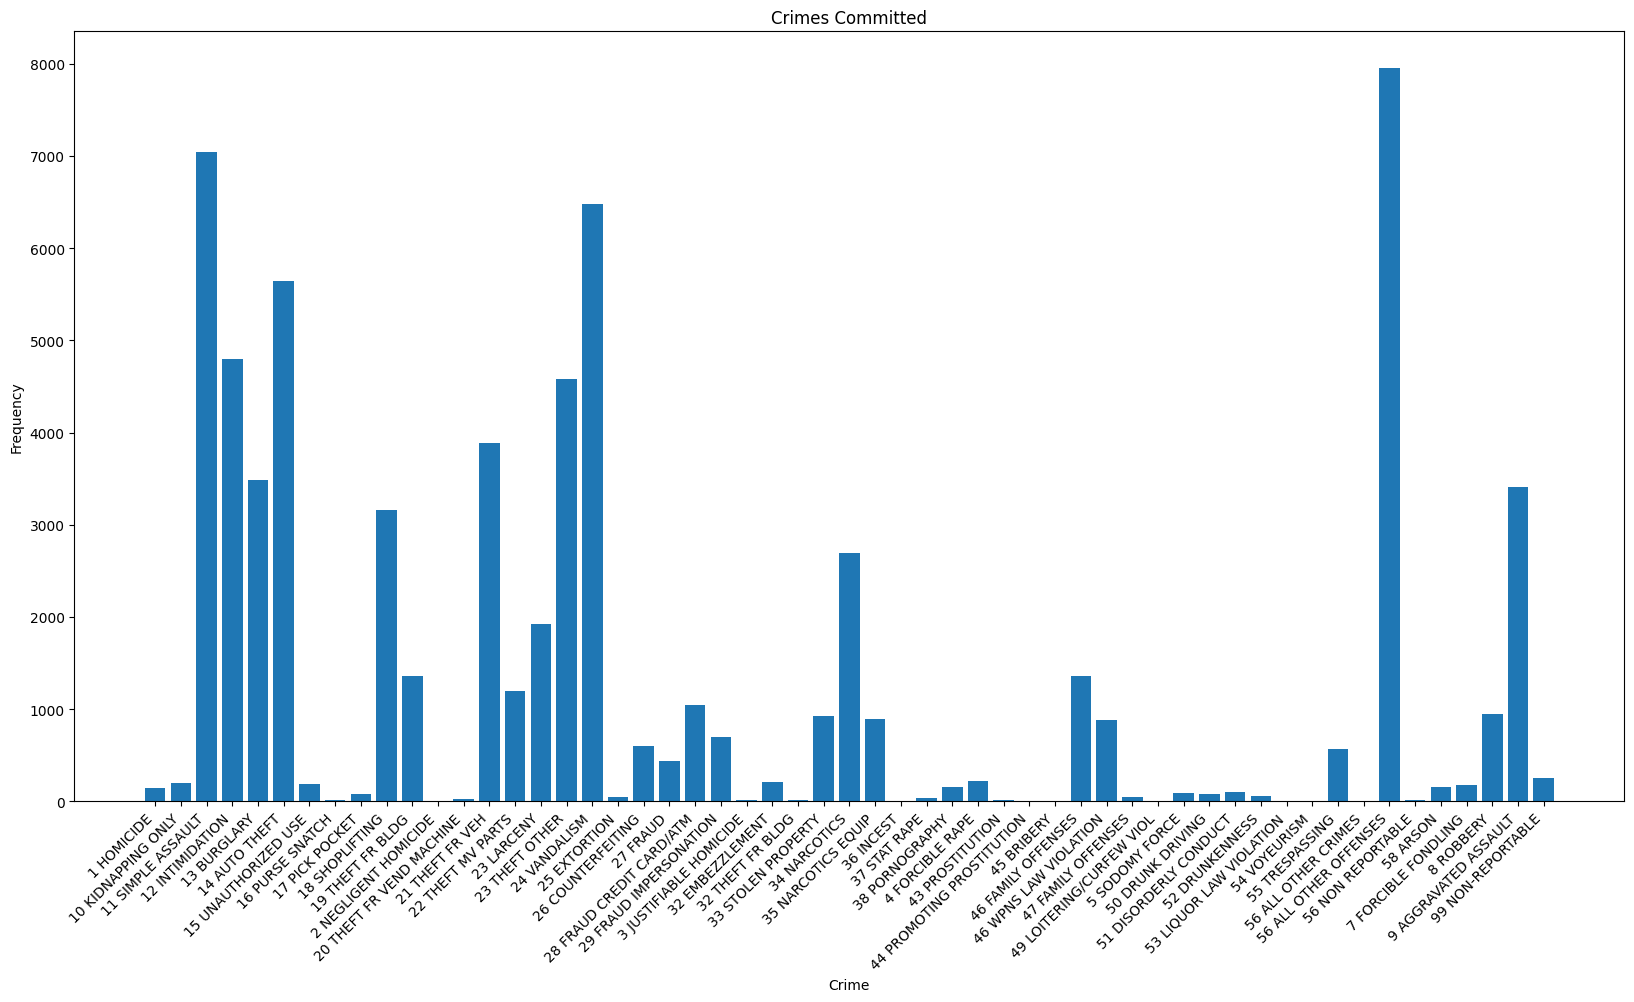

In [129]:
plt.figure(figsize=(20,10))
plt.bar(Louisville_Crimes_df.index, Louisville_Crimes_df.values)
plt.xticks(rotation=45, ha="right")
plt.title("Crimes Committed")
plt.xlabel("Crime")
plt.ylabel("Frequency")

In [130]:
offenses = ["11 SIMPLE ASSAULT", "24 VANDALISM", "14 AUTO THEFT", "12 INTIMIDATION", "13 BURGLARY"]

Louisville_Crimes2 = LMPD_Analytics[LMPD_Analytics["offense_classification"].isin(offenses)].groupby("offense_classification").size().reset_index(name="count")

Louisville_Crimes2

,offense_classification,count
0,11 SIMPLE ASSAULT,7266
1,12 INTIMIDATION,4946
2,13 BURGLARY,3556
3,14 AUTO THEFT,5789
4,24 VANDALISM,6623


Text(0, 0.5, 'Reported Occurences')

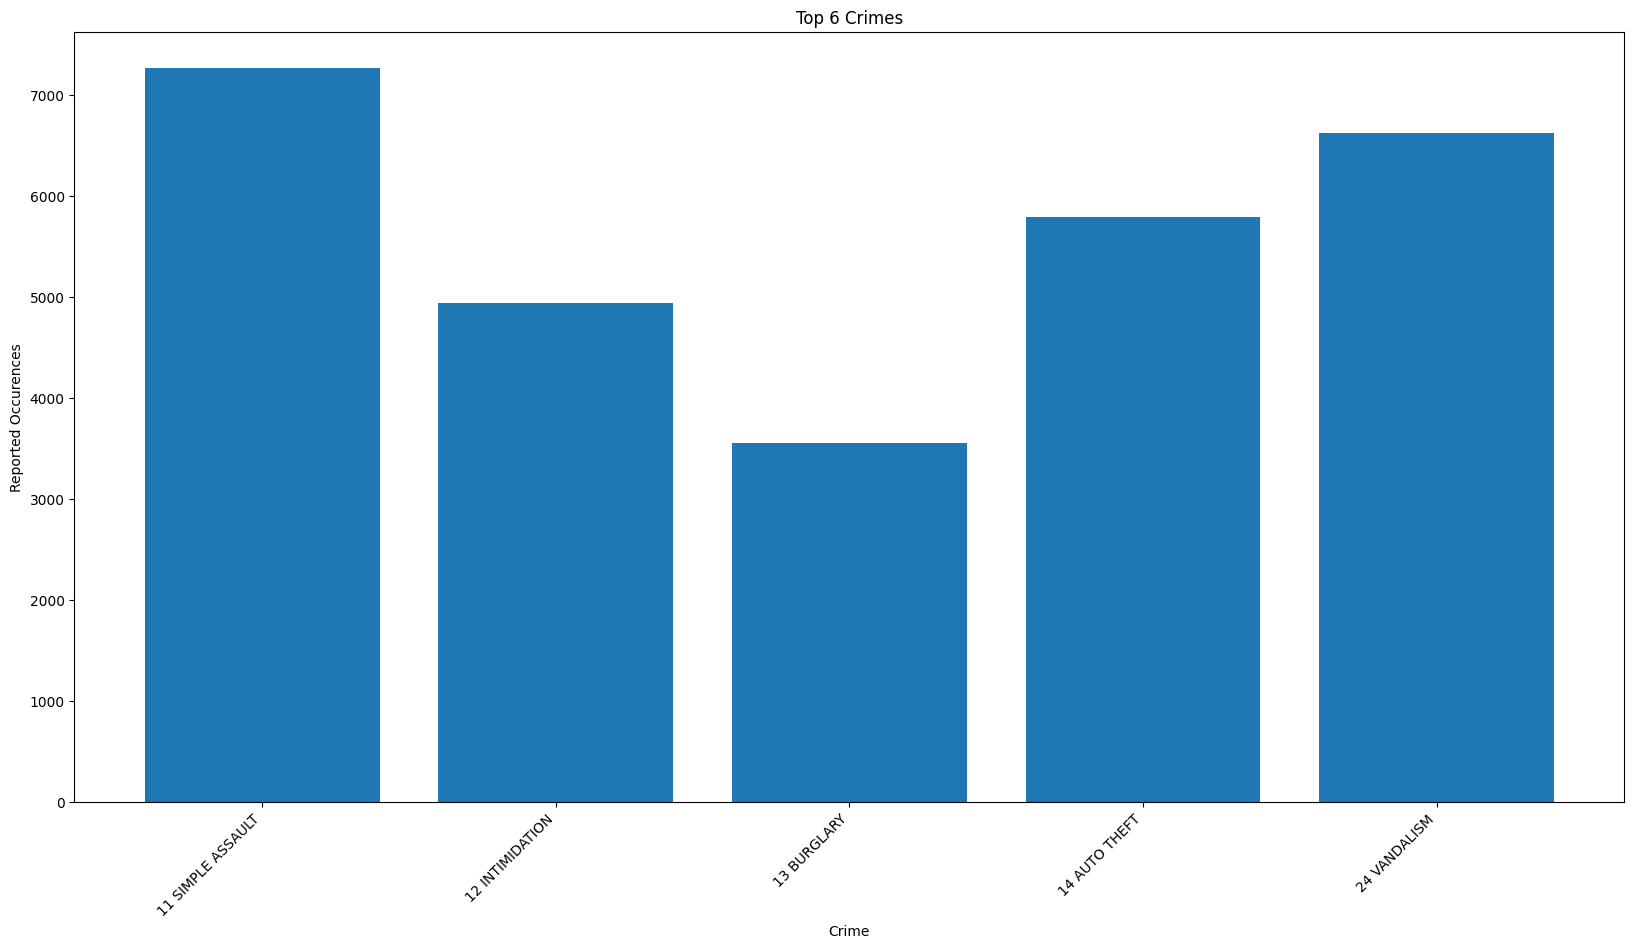

In [131]:
plt.figure(figsize=(20,10))
plt.bar(Louisville_Crimes2["offense_classification"], Louisville_Crimes2["count"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 6 Crimes")
plt.xlabel("Crime")
plt.ylabel("Reported Occurences")

### The goal of this graph is to find out which crimes were reported the most often. I picked these crimes specific crimes because they had the highest occurrences.

In [132]:
Local_Crimes = LMPD_Analytics.groupby("zip_code")["offense_classification"].value_counts()

Local_Crimes

zip_code  offense_classification  
0         4 FORCIBLE RAPE             1
30339     28 FRAUD CREDIT CARD/ATM    1
30349     56 ALL OTHER OFFENSES       1
33054     14 AUTO THEFT               1
40004     33 STOLEN PROPERTY          1
                                     ..
99999     43 PROSTITUTION             2
          23 THEFT OTHER              1
          27 FRAUD                    1
          33 STOLEN PROPERTY          1
          46 FAMILY OFFENSES          1
Name: count, Length: 1652, dtype: int64

In [165]:
Local_Crimes = LMPD_Analytics.groupby("zip_code")["offense_classification"].value_counts().sort_values(ascending=False)

Local_Crimes

zip_code  offense_classification
40211     56 ALL OTHER OFFENSES     620
40215     56 ALL OTHER OFFENSES     582
40203     56 ALL OTHER OFFENSES     574
40202     21 THEFT FR VEH           553
40212     56 ALL OTHER OFFENSES     546
                                   ... 
40014     33 STOLEN PROPERTY          1
          27 FRAUD                    1
          24 VANDALISM                1
          23 LARCENY                  1
          11 SIMPLE ASSAULT           1
Name: count, Length: 1652, dtype: int64

In [170]:
Louisville_Crimes = (
    LMPD_Analytics[LMPD_Analytics["city"] == "LOUISVILLE"]
    .groupby("offense_classification")
    .size()
    .reset_index(name="count")
)

Louisville_Crimes

,offense_classification,count
0,1 HOMICIDE,148
1,10 KIDNAPPING ONLY,195
2,11 SIMPLE ASSAULT,7044
3,12 INTIMIDATION,4800
4,13 BURGLARY,3487
5,14 AUTO THEFT,5640
6,15 UNAUTHORIZED USE,190
7,16 PURSE SNATCH,15
8,17 PICK POCKET,84
9,18 SHOPLIFTING,3157


In [136]:
Local_Crimes2 = (
    LMPD_Analytics
    .groupby("zip_code")["offense_classification"]
    .size()
    .sort_values(ascending=False)
)
Local_Crimes2

zip_code
40203    4986
40211    4828
40214    4686
40219    4667
40202    4121
         ... 
47129       1
47807       1
48089       1
60609       1
90015       1
Name: offense_classification, Length: 145, dtype: int64

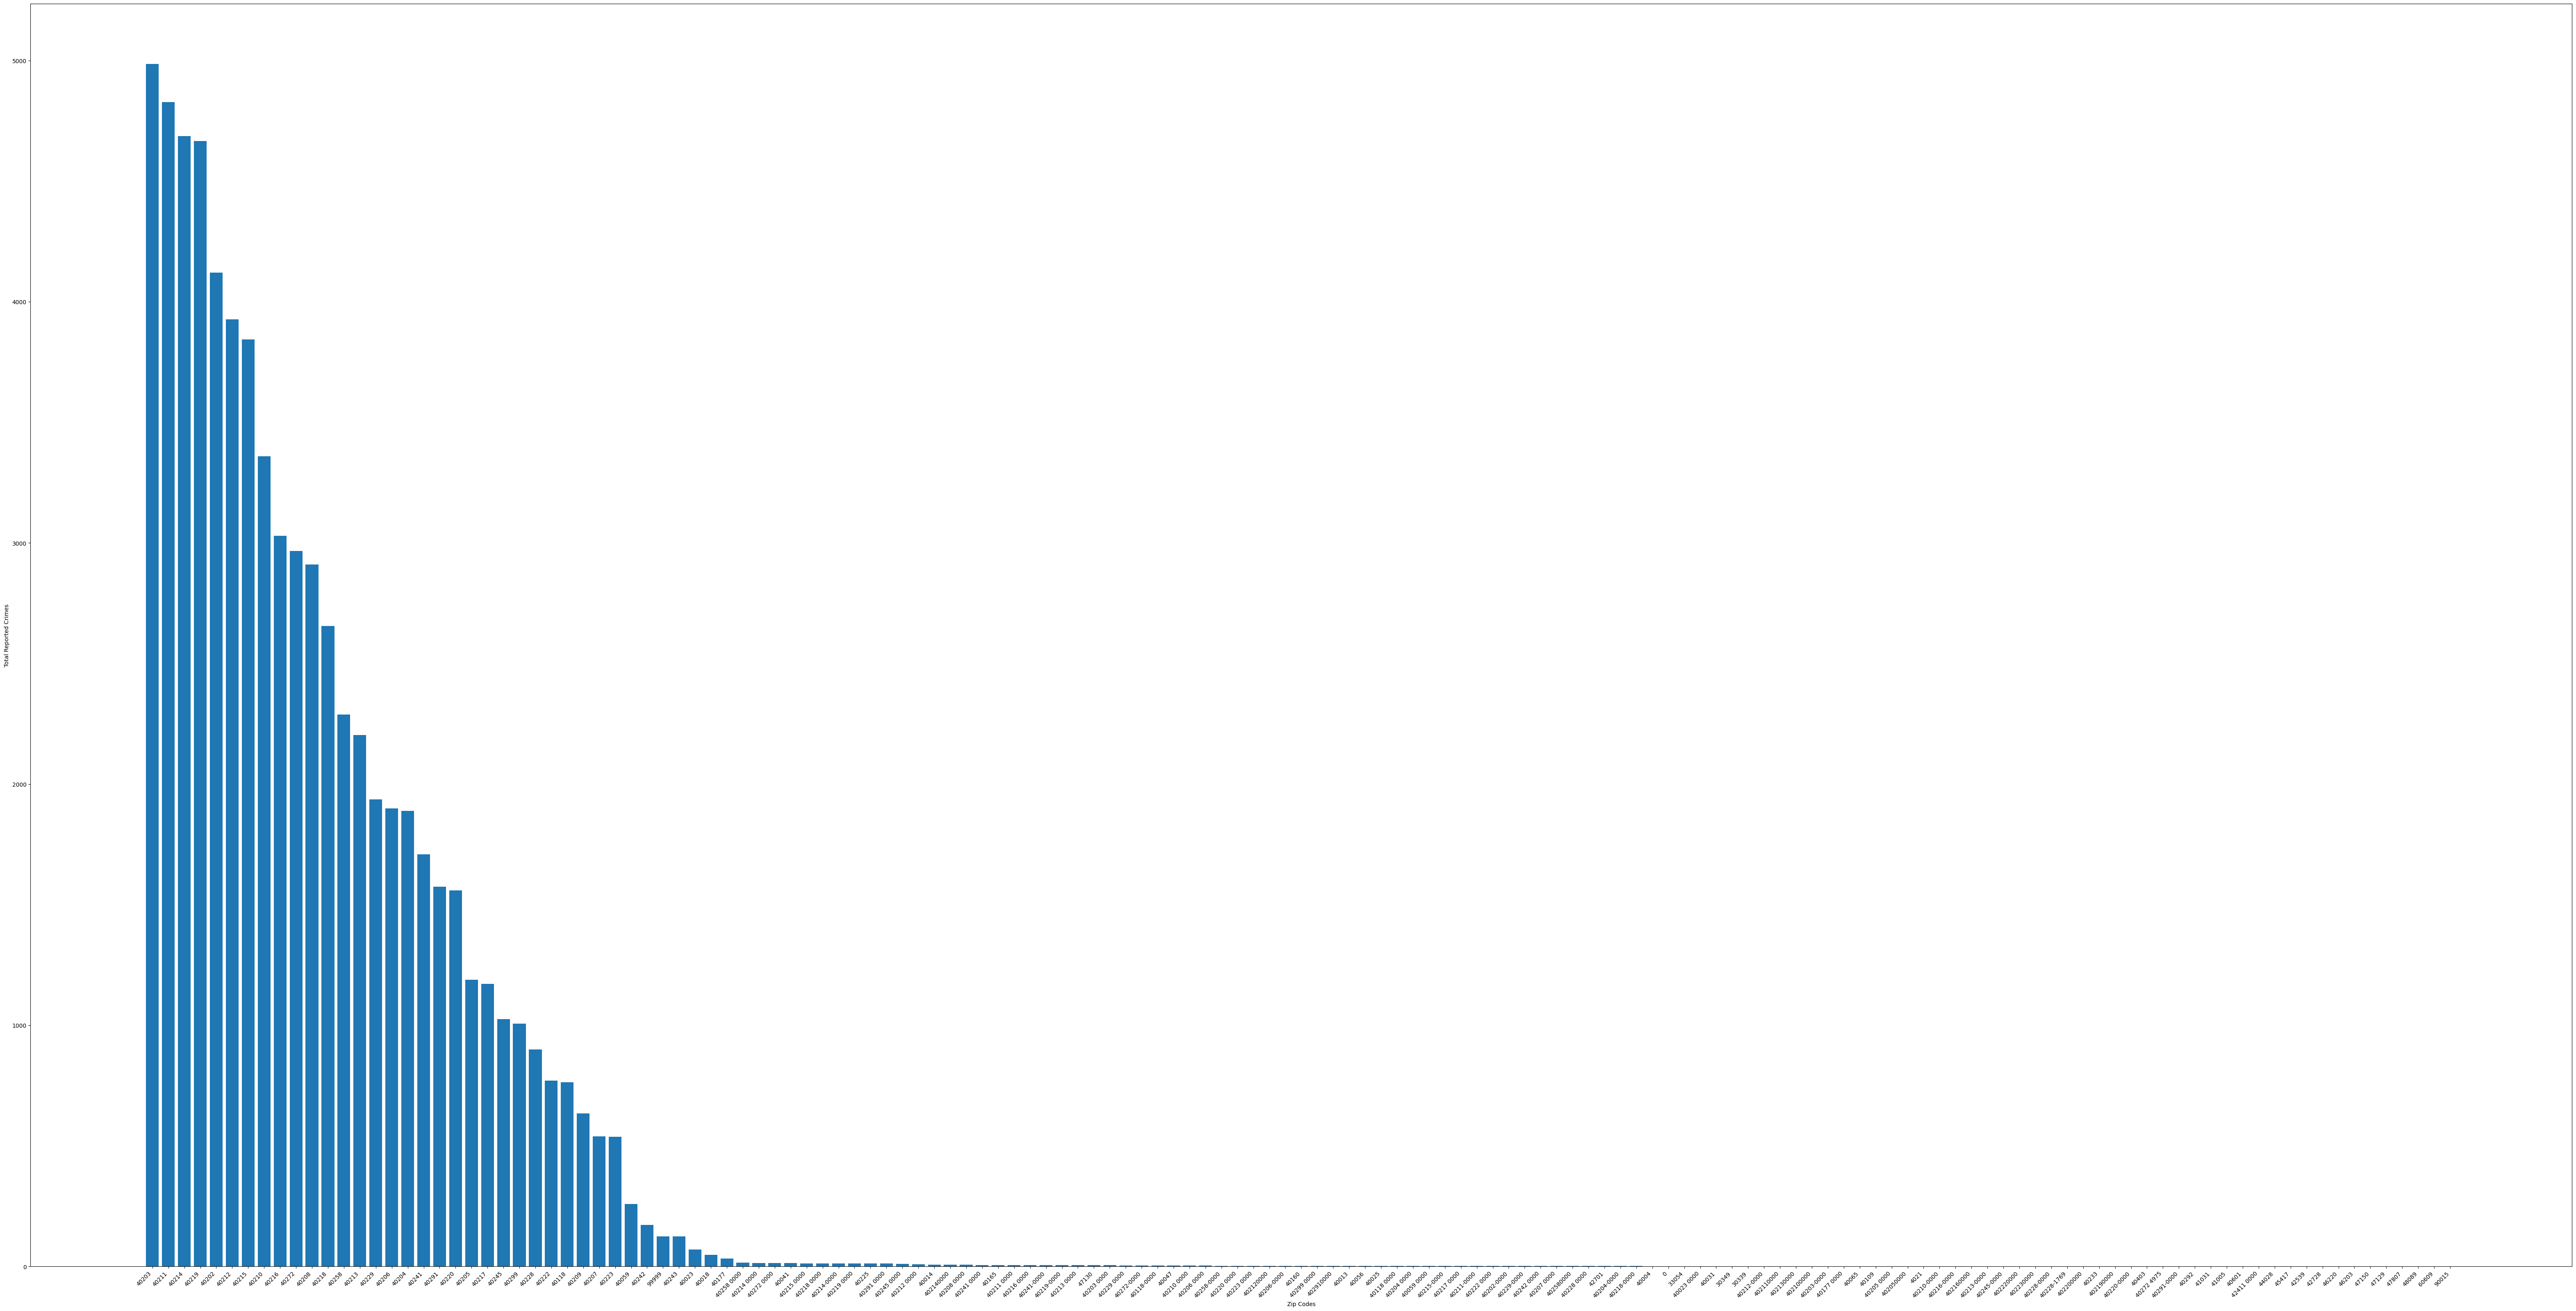

In [ ]:
plt.figure(figsize=(80,40))
plt.bar(Local_Crimes2.index, Local_Crimes2.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Zip Codes", )
plt.ylabel("Total Reported Crimes")
plt.tight_layout
plt.show()

### This graph is a visualization of crimes reported across all listed zip codes in the dataset. The crimes in this dataset is inclusive of a column referred to as "all other offenses". This particular visualization is not only misleading but woefully overwhelming. Despite my best efforts I couldn't get the font any smaller.

In [164]:
Local_Crimes2 = (
    LMPD_Analytics
    .groupby("zip_code")["offense_classification"]
    .size()
    .sort_values(ascending=False)
)

Local_Crimes2

zip_code
40203    4986
40211    4828
40214    4686
40219    4667
40202    4121
         ... 
47129       1
47807       1
48089       1
60609       1
90015       1
Name: offense_classification, Length: 145, dtype: int64

In [163]:
Local_Crimes = (
    LMPD_Analytics
    .groupby(["zip_code", "offense_classification"])
    .size()
    .reset_index(name="count")
)

Local_Crimes

,zip_code,offense_classification,count
0,0,4 FORCIBLE RAPE,1
1,30339,28 FRAUD CREDIT CARD/ATM,1
2,30349,56 ALL OTHER OFFENSES,1
3,33054,14 AUTO THEFT,1
4,40004,33 STOLEN PROPERTY,1
...,...,...,...
1647,99999,46 FAMILY OFFENSES,1
1648,99999,5 SODOMY FORCE,7
1649,99999,56 ALL OTHER OFFENSES,3
1650,99999,7 FORCIBLE FONDLING,10


In [197]:
Kill_zone = (
    LMPD_Analytics[
        (LMPD_Analytics["offense_classification"] == "1 HOMICIDE") &
        (LMPD_Analytics["zip_code"].isin(zip_codes))
    ]
    .groupby("zip_code")
    .size()
    .reindex(zip_codes, fill_value=0)
)

Kill_zone

zip_code
40203    17
40211    14
40214    11
40219     6
40202     4
dtype: int64

In [198]:
Den_of_Thieves = (
    LMPD_Analytics[
        (LMPD_Analytics["offense_classification"] == "13 BURGLARY") &
        (LMPD_Analytics["zip_code"].isin(zip_codes))
    ]
    .groupby("zip_code")
    .size()
    .reindex(zip_codes, fill_value=0)
)

Den_of_Thieves

zip_code
40203    280
40211    275
40214    277
40219    188
40202    158
dtype: int64

Text(0.5, 1.0, 'Den of Thieves')

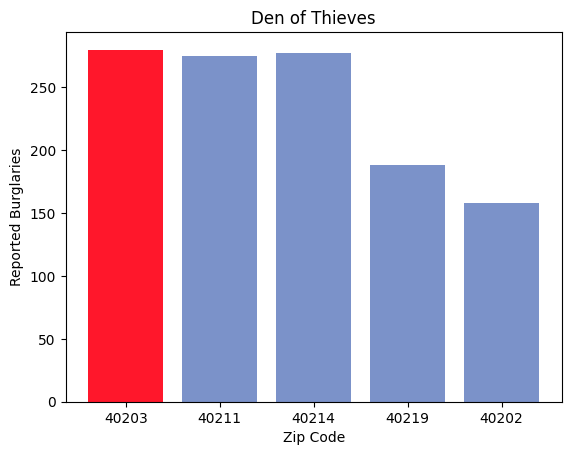

In [200]:
colors = ["#7b92c9"]*len(Kill_zone)
max_index = Den_of_Thieves.idxmax()
highlight_position = Den_of_Thieves.index.get_loc(max_index)
colors[highlight_position] = "#ff172b"

plt.bar(
    Den_of_Thieves.index,
    Den_of_Thieves.values,
    color = colors
)

plt.xlabel("Zip Code")
plt.ylabel("Reported Burglaries")
plt.title("Den of Thieves")

### This is a graph showing the different number of reported burglaries across assorted zip codes. I picked burglary because out of all forms of theft, burglaries appear to have been reported the most.

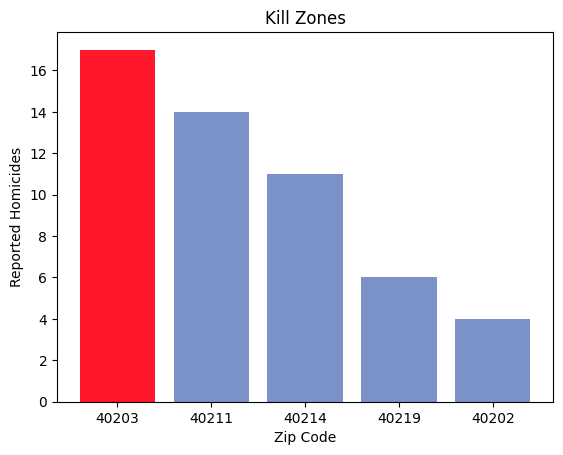

In [189]:
colors = ["#7b92c9"]*len(Kill_zone)
max_index = Kill_zone.idxmax()
highlight_position = Kill_zone.index.get_loc(max_index)
colors[highlight_position] = "#ff172b"

plt.bar(
    Kill_zone.index,
    Kill_zone.values,
    color=colors
)

plt.xlabel("Zip Code")
plt.ylabel("Reported Homicides")
plt.title("Kill Zones")
plt.tight_layout
plt.show()

### This bar graph shows the different zip codes that had the highest reported rates of homicides. I used red to show which zip code had the highest rate of reported homicides. Whether more homicides actually occurred in this area or were simply reported more often remains a mystery.

In [202]:
Fight_Night = (
    LMPD_Analytics[
        (LMPD_Analytics["offense_classification"] == "11 SIMPLE ASSAULT") &
        (LMPD_Analytics["zip_code"].isin(zip_codes))
    ]
    .groupby("zip_code")
    .size()
    .reindex(zip_codes, fill_value=0)
)

Fight_Night

zip_code
40203    524
40211    509
40214    540
40219    531
40202    352
dtype: int64

Text(0.5, 1.0, 'Fight Night')

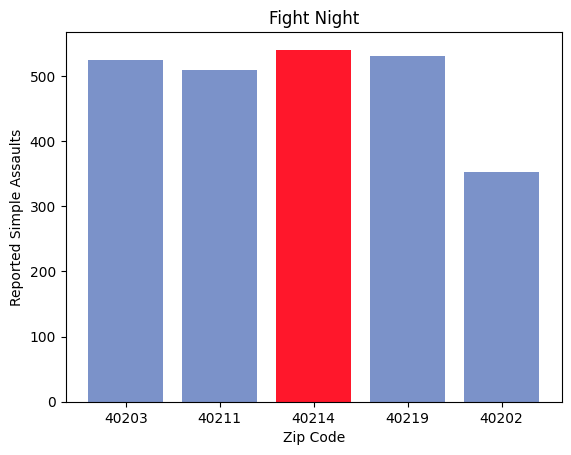

In [203]:
colors = ["#7b92c9"]*len(Kill_zone)
max_index = Fight_Night.idxmax()
highlight_position = Fight_Night.index.get_loc(max_index)
colors[highlight_position] = "#ff172b"

plt.bar(
    Fight_Night.index,
    Fight_Night.values,
    color = colors
)

plt.xlabel("Zip Code")
plt.ylabel("Reported Simple Assaults")
plt.title("Fight Night")

### This is a graph comparing simple assaults reported by different zip codes. I chose the crime of simple assaults because it's the one specific crime that had the highest reported occurrence according to the data.